# # <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np
%matplotlib inline
data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
regr1 = linear_model.LinearRegression()
pred=regr1.fit(x_train, y_train).predict(x_test)
print ("The MSE for linear regression on the test set data is", mean_squared_error(y_test,pred))


C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


The MSE for linear regression on the test set data is 6455.708453830031


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

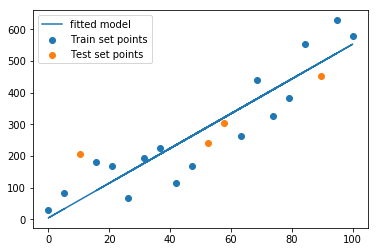

In [4]:
#Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.
plt.scatter(x_train, y_train,label='Train set points')
plt.scatter(x_test, y_test,label='Test set points')
plt.plot(x_train,regr1.fit(x_train, y_train).predict(x_train),label='fitted model')
plt.legend()
plt.show()

(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
for i in [1,2,3,5]:
    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(x_train)
    predict_ = poly.fit_transform(x_test)
    clf = linear_model.LinearRegression()
    clf.fit(X_, y_train)
    print ('The MSE on train set with polynomial model of degree',i, 'is', mean_squared_error(y_train,clf.predict(X_)))

The MSE on train set with polynomial model of degree 1 is 5339.13205212213
The MSE on train set with polynomial model of degree 2 is 3638.12177725299
The MSE on train set with polynomial model of degree 3 is 3569.900366307118
The MSE on train set with polynomial model of degree 5 is 2661.5660744383727


In [6]:
from sklearn.preprocessing import PolynomialFeatures
for i in [1,2,3,5]:
    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(x_train)
    predict_ = poly.fit_transform(x_test)
    clf = linear_model.LinearRegression()
    clf.fit(X_, y_train)
    print ('The MSE on test set with polynomial model of degree',i, 'is', mean_squared_error(y_test,clf.predict(predict_)))

The MSE on test set with polynomial model of degree 1 is 6455.70845383002
The MSE on test set with polynomial model of degree 2 is 4683.309906329018
The MSE on test set with polynomial model of degree 3 is 4602.202716053174
The MSE on test set with polynomial model of degree 5 is 6599.133603518122


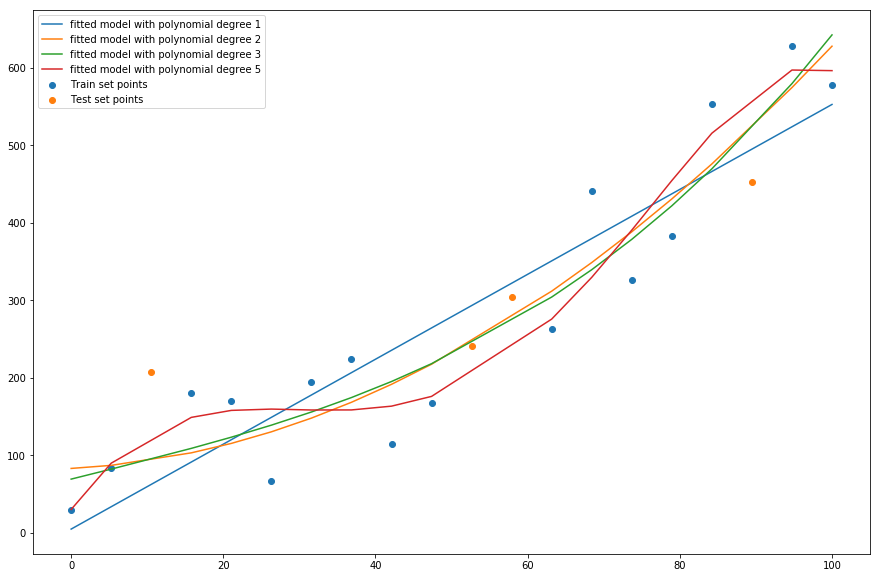

In [7]:
from numpy import *
import pylab
plt.figure(figsize=(15,10))
plt.scatter(x_train, y_train,label='Train set points')
plt.scatter(x_test, y_test,label='Test set points')
for i in [1,2,3,5]:
    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(x_train)
    predict_ = poly.fit_transform(x_test)
    clf = linear_model.LinearRegression()
    clf.fit(X_, y_train)
    predictedy=clf.predict(poly.fit_transform(sorted(x_train, reverse = False)))
    plt.plot(sorted(x_train, reverse = False),predictedy,label='fitted model with polynomial degree %i' %i)
plt.legend()
plt.show()

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

polynomial with degree 3 perform the best. The model with polynomial 3 has the lowest MSE. Because the complexity is increasing the bias is decreasing. On the other hand, as the complexity is increasing, the variance also increases (that's the reason why polynomial degree 5 has higher MSE). Thus, polynomial with degree 3 optimized when having bias-variance tradeoff.

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

In [9]:
data.shape

(200, 4)

In [10]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

#### If we assume outlier cutoff is Q1-1.5*IQR, and Q3+1.5*IQR

In [11]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1af1e668c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1af1e6744e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af1e6686d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1af1e674d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af1e674e10>],
 'means': []}

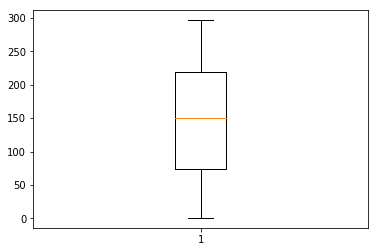

In [12]:
plt.boxplot(data['TV'])

In [13]:
Q1_TV=data['TV'].quantile(0.25)
Q3_TV=data['TV'].quantile(0.75)
IQR_TV=Q3_TV-Q1_TV
print('the data should be from',Q1_TV-1.5*IQR_TV, 'to',Q3_TV+1.5*IQR_TV,', other data points should be seen as outlier.')

the data should be from -142.29999999999998 to 435.5 , other data points should be seen as outlier.


{'whiskers': [<matplotlib.lines.Line2D at 0x1af1e6d1828>,
 'caps': [<matplotlib.lines.Line2D at 0x1af1e6d1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af1e6d12e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1af1e6db908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af1e6dbd30>],
 'means': []}

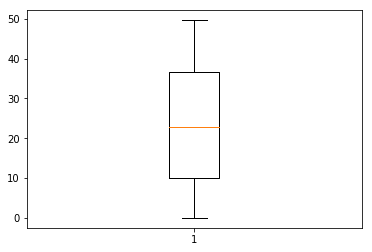

In [14]:
plt.boxplot(data['Radio'])

In [15]:
Q1_Radio=data['Radio'].quantile(0.25)
Q3_Radio=data['Radio'].quantile(0.75)
IQR_Radio=Q3_Radio-Q1_Radio
print('the data should be from',Q1_Radio-1.5*IQR_Radio, 'to',Q3_Radio+1.5*IQR_Radio,', other data points should be seen as outlier.')

the data should be from -29.849999999999994 to 76.35 , other data points should be seen as outlier.


{'whiskers': [<matplotlib.lines.Line2D at 0x1af1e727d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1af1e7305f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af1e727828>],
 'medians': [<matplotlib.lines.Line2D at 0x1af1e730e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af1e730f28>],
 'means': []}

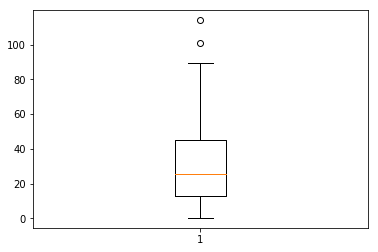

In [16]:
plt.boxplot(data['Newspaper'])

In [17]:
Q1_Newspaper=data['Newspaper'].quantile(0.25)
Q3_Newspaper=data['Newspaper'].quantile(0.75)
IQR_Newspaper=Q3_Newspaper-Q1_Newspaper
print('the data should be from',Q1_Newspaper-1.5*IQR_Newspaper, 'to',Q3_Newspaper+1.5*IQR_Newspaper, ', other data points should be seen as outlier.')

the data should be from -35.775000000000006 to 93.625 , other data points should be seen as outlier.


{'whiskers': [<matplotlib.lines.Line2D at 0x1af1e782e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1af1e78bb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af1e782d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1af1e794390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af1e7947b8>],
 'means': []}

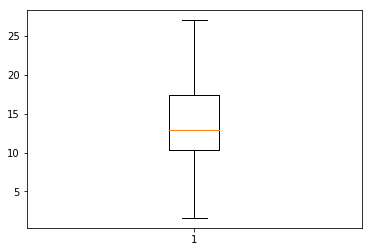

In [18]:
plt.boxplot(data['Sales'])

In [19]:
Q1_Sales=data['Sales'].quantile(0.25)
Q3_Sales=data['Sales'].quantile(0.75)
IQR_Sales=Q3_Sales-Q1_Sales
print('the data should be from',Q1_Sales-1.5*IQR_Sales, 'to',Q3_Sales+1.5*IQR_Sales,', other data points should be seen as outlier.')

the data should be from -0.16249999999999787 to 27.937499999999996 , other data points should be seen as outlier.


(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

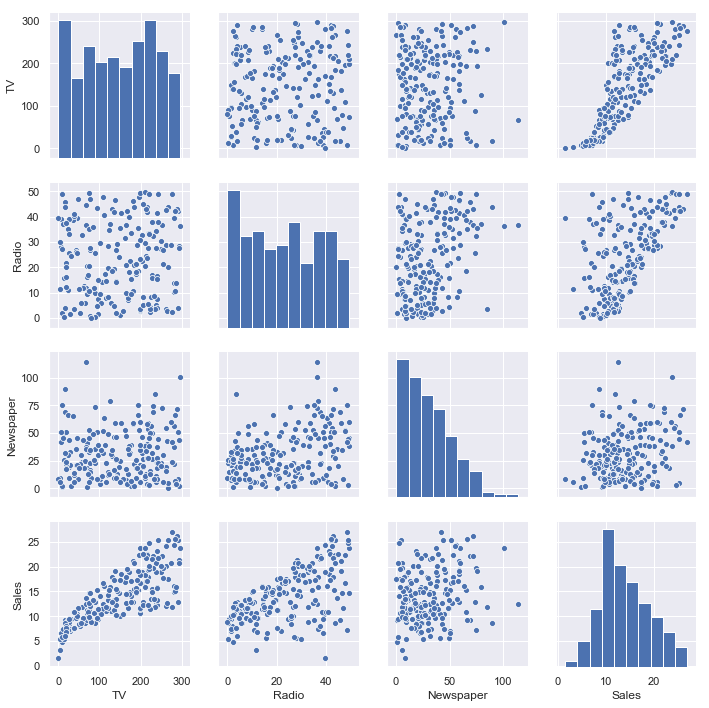

In [20]:
import seaborn as sns
sns.set()
sns.pairplot(data)

The feature TV, Radio and Newspaper all have clear correlation with sales, but doesn't show a clear correlation between each features.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [21]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('Sales ~ TV', data=data, return_type='dataframe')

In [22]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           1.47e-42
Time:                        21:41:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

The intercept of the simple regression model is 7.0326, and regression coefficient for 'TV' is 0.0475 thousand of widges. The interpretation is that ignoring other variables and keep them as constant, every 1000 advertising dollars spent on TV for a single product, the sales goes up by 0.0475. If no dollars spent, the sales will be 7.0326 thousand of widges.

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

In [23]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(data[['TV','Radio','Newspaper']],data['Sales'],test_size = 0.33, random_state=42)

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

In [24]:
import math
from sklearn.metrics import mean_squared_error
regr2 = linear_model.LinearRegression()
pred2=regr2.fit(trainx, trainy).predict(testx)
print ("The RMSE for linear regression is", math.sqrt(mean_squared_error(testy,pred2)))

The RMSE for linear regression is 1.9307843822347193


(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

In [25]:
print('The MSE on training data is', mean_squared_error(regr2.fit(trainx, trainy).predict(trainx),trainy))

The MSE on training data is 2.4108586545578543


In [26]:
print('The MSE on test data is',mean_squared_error(regr2.fit(trainx, trainy).predict(testx),testy))

The MSE on test data is 3.727928330681506


In [27]:
print('The increase is',mean_squared_error(regr2.fit(trainx, trainy).predict(testx),testy)-mean_squared_error(regr2.fit(trainx, trainy).predict(trainx),trainy))

The increase is 1.3170696761236518


The increase in test set verifies the fact that as the model becomes more complex, it is likely that the model is fitting the data. Eventhough the error on training set is small, the error on test set is bigger. 

(g) (1pts) Report the coefficients obtained by your model.

In [28]:
print ('the coefficients corresponding to TV, Radio, Newspaper are',regr2.coef_)


the coefficients corresponding to TV, Radio, Newspaper are [0.04466512 0.19663006 0.00607439]


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [29]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

C:\Users\rache\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [31]:
regr3=linear_model.LinearRegression()
pred3=regr3.fit(X_train, y_train).predict(X_test)
print ("The RMSE for linear regression on test set is", math.sqrt(mean_squared_error(y_test,pred3)))

The RMSE for linear regression on test set is 57.42805977285358


In [32]:
pred4=regr3.fit(X_train, y_train).predict(X_train)
print ("The RMSE for linear regression on train set is", math.sqrt(mean_squared_error(y_train,pred4)))

The RMSE for linear regression on train set is 52.007732294217874


In [33]:
print('The increase when score on X_test is',math.sqrt(mean_squared_error(y_test,pred3))-math.sqrt(mean_squared_error(y_train,pred4)))
print('This verifies the fact that the error on the test set is tend to be higher than that on the training set.')

The increase when score on X_test is 5.420327478635706
This verifies the fact that the error on the test set is tend to be higher than that on the training set.


b) (3 points) Now fit the regression model using Huber loss. You can use the sklearn package. Set regularization parameter alpha to 0.0 and all other parameters as default. Report RMSE obtained on both X_train and X_test.

In [34]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha=0.0)
pred_huber_train=huber.fit(X_train, y_train).predict(X_train)
print ("The RMSE on linear regression using Huber loss on train set is", math.sqrt(mean_squared_error(y_train,pred_huber_train)))

The RMSE on linear regression using Huber loss on train set is 52.16357035670655


In [35]:
pred_huber_test=huber.fit(X_train, y_train).predict(X_test)
print ("The RMSE on linear regression using Huber loss on test set is", math.sqrt(mean_squared_error(y_test,pred_huber_test)))


The RMSE on linear regression using Huber loss on test set is 57.150050095483834


Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

In [36]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

### Assuming we're using the original set to calculate the MSE 

In [37]:
outlier_regr=linear_model.LinearRegression()
outlier_regr_train=outlier_regr.fit(X_train,y_train_outliers).predict(X_train)
print ("The RMSE on linear regression on train set is", math.sqrt(mean_squared_error(y_train,outlier_regr_train)))


The RMSE on linear regression on train set is 70.37144904260703


### Assuming we're using the outlier set to calculate the MSE 


In [38]:
outlier_regr=linear_model.LinearRegression()
outlier_regr_train=outlier_regr.fit(X_train,y_train_outliers).predict(X_train)
print ("The RMSE on linear regression on train outlier set is", math.sqrt(mean_squared_error(y_train_outliers,outlier_regr_train)))


The RMSE on linear regression on train outlier set is 286.2641030656008


In [39]:
outlier_regr=linear_model.LinearRegression()
outlier_regr_test=outlier_regr.fit(X_train,y_train_outliers).predict(X_test)
print ("The RMSE on linear regression on test set is", math.sqrt(mean_squared_error(y_test,outlier_regr_test)))


The RMSE on linear regression on test set is 82.21820407137493


d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

### Assuming we're using the original set to calculate the MSE 

In [40]:
huber_outlier = HuberRegressor(alpha=0.0)
huber_outlier_pred_train=huber_outlier.fit(X_train,y_train_outliers).predict(X_train)
print ("The RMSE on linear regression using huber loss on train set is", math.sqrt(mean_squared_error(y_train,huber_outlier_pred_train)))


The RMSE on linear regression using huber loss on train set is 52.17803850064481


### Assuming we're using the original set to calculate the MSE 

In [41]:
huber_outlier = HuberRegressor(alpha=0.0)
huber_outlier_pred_train=huber_outlier.fit(X_train,y_train_outliers).predict(X_train)
print ("The RMSE on linear regression using huber loss on train outlier set is", math.sqrt(mean_squared_error(y_train_outliers,huber_outlier_pred_train)))


The RMSE on linear regression using huber loss on train outlier set is 290.22238334765404


In [42]:
huber_outlier_pred_test=huber_outlier.fit(X_train,y_train_outliers).predict(X_test)
print ("The RMSE on linear regression using huber loss on test set is", math.sqrt(mean_squared_error(y_test,huber_outlier_pred_test)))


The RMSE on linear regression using huber loss on test set is 57.56638708274611


The RMSE generated by huber loss on either train or test is lower compare to the regular multiple linear regression. This is because Huber loss are less sentitive to the outliers. 

e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

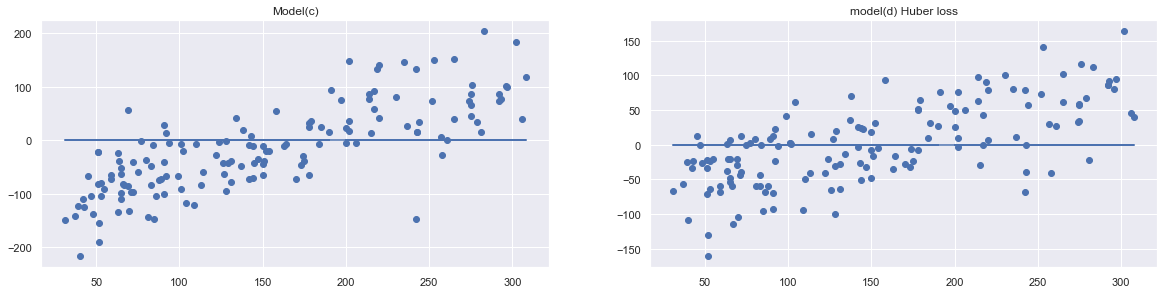

In [43]:
fig = plt.figure(figsize=(20, 10))

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Model(c)') # non OOP: plt.title('The function f')
sub2 = fig.add_subplot(222)
sub2.set_title('model(d) Huber loss')
sub1.scatter(y_test,y_test-outlier_regr_test)
sub1.plot(y_test,[0]*len(y_test))
sub2.scatter(y_test,y_test-huber_outlier_pred_test)
sub2.plot(y_test,[0]*len(y_test))
plt.show()

In [44]:
std(y_test-outlier_regr_test)

80.55295417486981

In [45]:
std(y_test-huber_outlier_pred_test)

57.54780335740489

Model (d) Huber Loss looks better becasue the standard deviation of the residuals is obviously lower than that from regular regression. 

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

In [46]:
feature_name = ['x'+str(i) for i in range(1,11)]
print(feature_name)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

In [47]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = linear_model.LinearRegression()
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, y_train)
selector.support_ 

array([False, False,  True, False,  True, False, False, False,  True,
       False])

In [48]:
selector.ranking_

array([8, 6, 1, 2, 1, 5, 4, 3, 1, 7])

Thus, from the result above, the 3 most important features are x3,x5,and x9.

g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

## manually writing the code, we have the result as followed:

In [49]:
#selecting the first feature
estimator_forward = linear_model.LinearRegression()
mse_array=np.zeros((10))
for i in range(10):
    X_train_forward=X_train[:,i].reshape(-1,1)
    estimator_forward.fit(X_train_forward,y_train)
    predict_forward=estimator_forward.predict(X_train_forward)
    mse=mean_squared_error(y_train,predict_forward)
    mse_array[i]=mse
print(mse_array)
index=np.argmin(mse_array)
print('The first feature we select is',feature_name[index])

[5393.03921272 5738.66169166 3736.34598638 4682.95437892 5584.15000717
 5666.93906464 4795.36492197 4679.96288617 3994.70019944 4902.69829302]
The first feature we select is x3


In [50]:
#selecting the second feature
mse_array=np.zeros((10))
mse_array[2]=1000000000
X_train_forward=np.zeros((X_train.shape[0],2))
X_train_forward[:,0]=X_train[:,2]
for i in range(10):
    if i!=2:
        X_train_forward[:,1]=X_train[:,i]
        estimator_forward.fit(X_train_forward,y_train)
        predict_forward=estimator_forward.predict(X_train_forward)
        mse=mean_squared_error(y_train,predict_forward)
        mse_array[i]=mse    
print(mse_array)
index=np.argmin(mse_array)
print('The second feature we select is',feature_name[index])

[3.63173025e+03 3.73591483e+03 1.00000000e+09 3.42514549e+03
 3.72355449e+03 3.73531770e+03 3.52247737e+03 3.48338049e+03
 3.12118428e+03 3.55047352e+03]
The second feature we select is x9


In [51]:
#selecting the third feature
mse_array=np.zeros((10))
mse_array[2]=1000000000
mse_array[8]=1000000000
X_train_forward=np.zeros((X_train.shape[0],3))
X_train_forward[:,0]=X_train[:,2]
X_train_forward[:,1]=X_train[:,8]
for i in range(10):
    if i!=2 or i!=8:
        X_train_forward[:,2]=X_train[:,i]
        estimator_forward.fit(X_train_forward,y_train)
        predict_forward=estimator_forward.predict(X_train_forward)
        mse=mean_squared_error(y_train,predict_forward)
        mse_array[i]=mse
print(mse_array)
index=np.argmin(mse_array)
print('The third feature we select is',feature_name[index])

[3106.73899955 3108.23336452 3121.18428347 3014.72703014 3005.59298693
 3075.38964158 3044.32514019 3107.75567372 3121.18428347 3102.03212814]
The third feature we select is x5


The first feature we select is x3, the second one is x9 and the third one is x5. The result is the same as what we've got in the backward selection.

# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

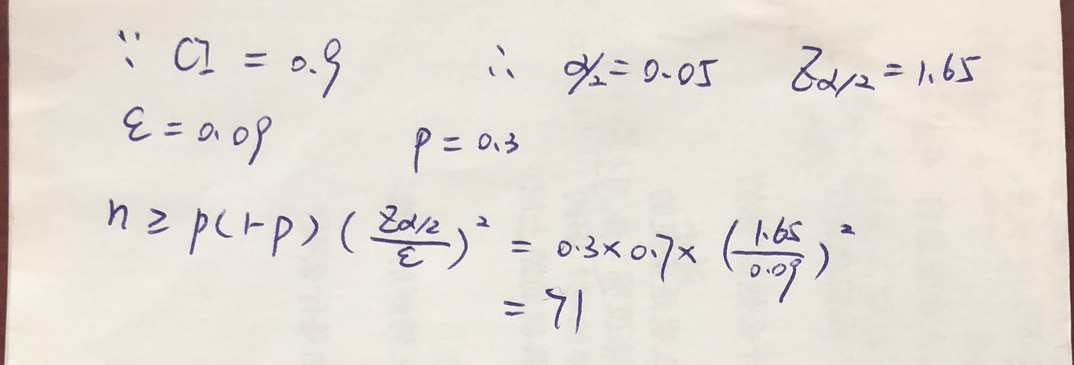

In [52]:
# a
from IPython.display import Image
Image(filename='3a.jpg')
# the necessary sample size is 71.

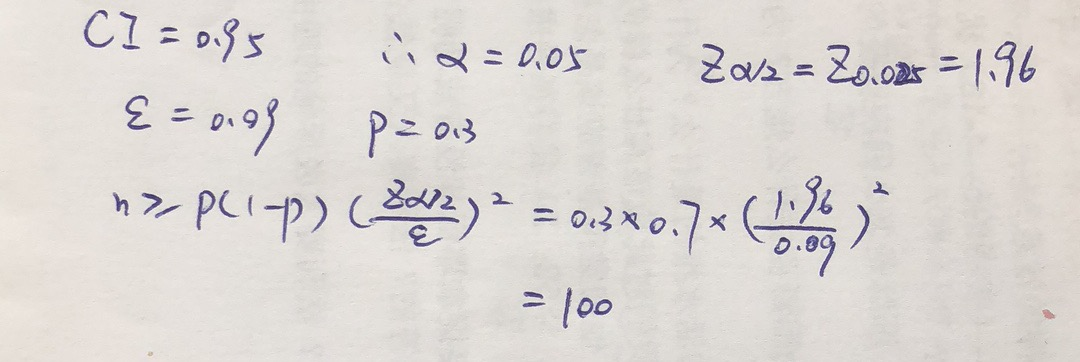

In [53]:
# b
Image(filename='3b.jpg')
# the necessary sample size is 100.

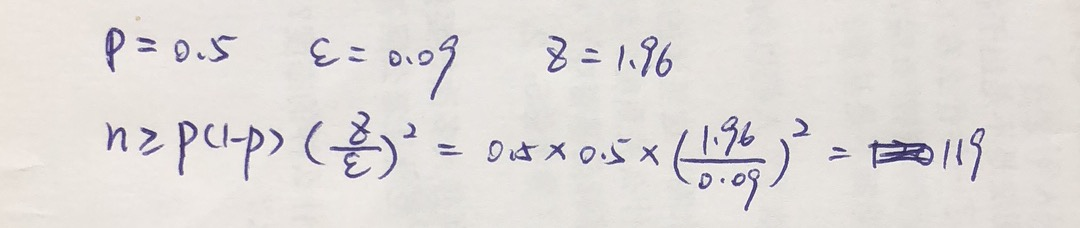

In [54]:
Image(filename='3c.jpg')
# the necessary sample size is 119.

# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [55]:
import pandas as pd
df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

In [57]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

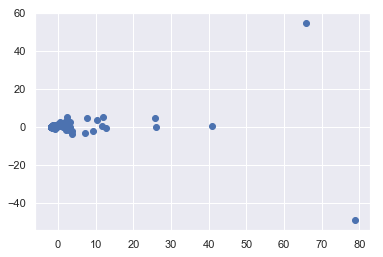

In [58]:
# a
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df_scaled)
plt.scatter(pc[:,0], pc[:,1])

In [59]:
# b
pc_df = pd.DataFrame(data=pc, columns=['pc1','pc2'])
l = pc_df.sort_values('pc1',ascending=False)[:6].index.values
for i in l:
    print(df.index.values[i])

China
Canada
Mexico
Japan
Germany
Italy


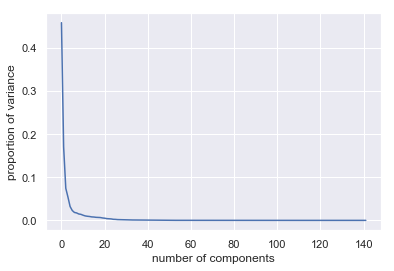

In [60]:
# c i
pca_f = PCA().fit(df_scaled)
plt.plot(pca_f.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('proportion of variance')
plt.show()

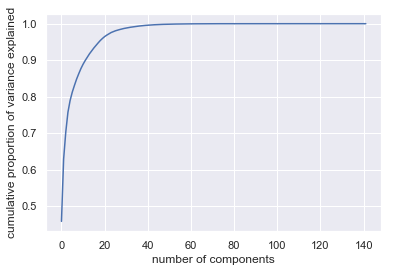

In [61]:
# c ii
plt.plot(np.cumsum(pca_f.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative proportion of variance explained')
plt.show()

In [62]:
# d
pca_90 = PCA(n_components=13).fit(df_scaled)
print(np.cumsum(pca_90.explained_variance_ratio_)[-1])
pca_60 = PCA(n_components=2).fit(df_scaled)
print(np.cumsum(pca_60.explained_variance_ratio_)[-1])
pca_30 = PCA(n_components=1).fit(df_scaled)
print(np.cumsum(pca_30.explained_variance_ratio_)[-1])

0.9086637183384683
0.6289169210862304
0.45836493185657173


13 principal components can explain cumulative variance of 90%.

2 principal components can explain cumulative variance of 60%.

Only 1 principal component can explain cumulative variance of 30%.

# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

### (a)

PCA is mostly used to reduce data and condense the information in many variables into a smaller set of new composite dimensions, with a minimum loss of the information.

PCA can also discover significant features of large data set and reveal relationships that were previously ignored, therefore providing interpretations that would not ordinarily result.

### (b)

The eigenvector tells the direction the matrix is blowing in and represents the axes of principal force that a matrix moves input along. The eigenvector shows the principal lines of force, and the axes of greatest variance and covariance illustrate where the data is most susceptible to change.

The eigenvalue shows the coefficients attached to eigenvectors, which is the axes magnitude or weight.